In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.drop_duplicates()
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Familiarising with the size of the df
df.shape

(768, 9)

This dataset has 9 columns with characteristics of people and 768 rows.

In [4]:
# Description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that there us none missing values as NaN as the count is always the same. We also know that some of the values can't be eqaul to 0. Like BMI, Insulin, SkinThickness, BloodPressure, Glucose. So the missing values are replaced with zeros. 
Let's replace them with NaN. 

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Replacing 0 values with NaN
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']:
    df[column].replace(0, np.nan, inplace=True)

In [7]:
# Dataframe with all NaN values removed for comparison
df_no_null = df.dropna(axis=0, inplace=False)
df_no_null.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Checking how many rows have 4 or more missing values
list_of_indices = []
for i in df.index:
    if df.iloc[i, :].isnull().sum() >= 4:
        list_of_indices.append(i)
print(len(list_of_indices))

7


As 7 rows are not even 1% of dataframe we will drop them.

In [9]:
# Dropping rows 
df.drop(index=list_of_indices)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [10]:
# Converting rest of missing values with median values of each column
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']:
    median = df[column].median()
    df[column].fillna(median, inplace=True)

In [11]:
# Lets check how the head looks now 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Lets check the correlation between columns.

In [12]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [13]:
df.rename(columns={'DiabetesPedigreeFunction': 'PedigreeFunction'}, inplace=True)

Text(0.5, 1.0, 'Correlation of columns')

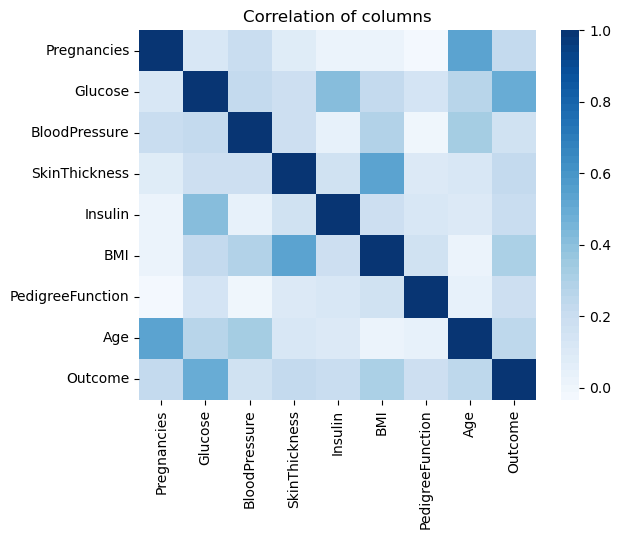

In [14]:
corr = df.corr()
sns.heatmap(corr, cmap=sns.color_palette("Blues",50))
plt.title('Correlation of columns')


Most impactfull on the outcome is glucose level, BMI and age.
There is a high correlation between glucose level and insulin level.
Age has high correlation to number of pregnancies.
Skin thickness depends on BMI.

Text(0.5, 1.0, 'Correlation of columns')

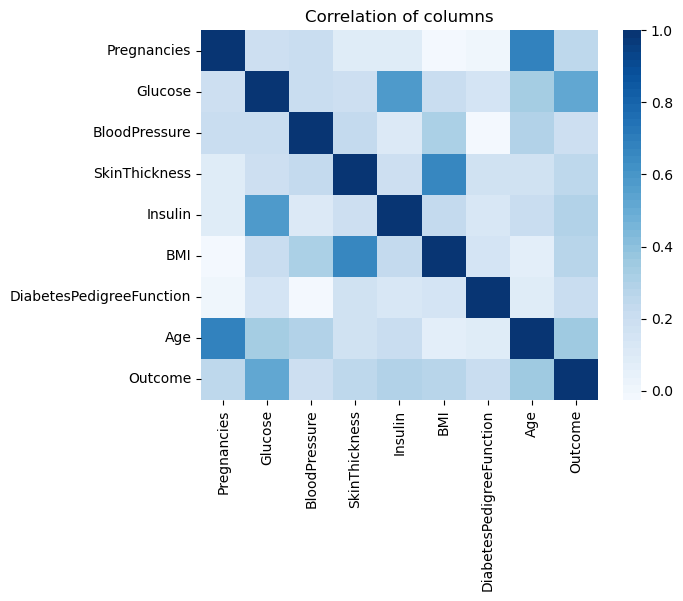

In [15]:
# Lets check the correlation for dataset with all null values removed
sns.heatmap(df_no_null.corr(), cmap=sns.color_palette("Blues",50))
plt.title("Correlation of columns")

The heatmap is based on the dataframe with almost half of the entries removed and it showed even highier correlation between age and number of pregnancies, glucose level and diabetes, skin thickness and BMI, and glucose level and insulin level. 

We can see that number of pregnancies, blood pressure and family history are the least impactfull on getting diabetes. 

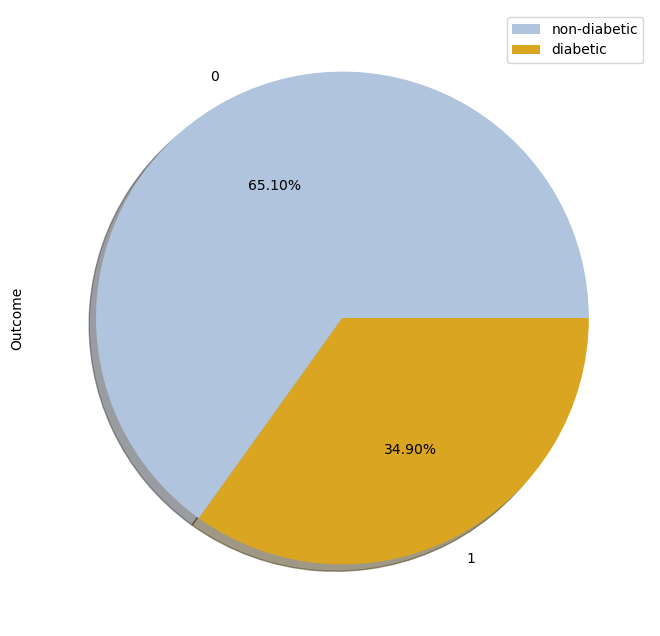

In [16]:
# Lets have a closer look at how many of all entries actually have diabetes.
diabetes = df['Outcome'].value_counts()
diabetes.plot.pie(subplots=True,figsize=(8, 8), autopct='%1.2f%%', shadow=True, colors=['lightsteelblue', 'goldenrod'])
plt.legend(['non-diabetic', 'diabetic'])

Most of the people in the dataset are not diabetic. 

In [17]:
# Now lets see what are glucose levels for people with diabetes and people without diabetes. 
df[['Outcome', 'Glucose']].groupby(['Outcome']).describe()

Glucose                                                         
          count        mean        std   min    25%    50%    75%    max
Outcome                                                                 
0         500.0  110.682000  24.707201  44.0   93.0  107.5  125.0  197.0
1         268.0  142.130597  29.568839  78.0  119.0  140.0  167.0  199.0

We can see that the average and the min values differ but the max values don't. This is exactly what we would expect from description of the disease itself. The blood sugar stays high for longer.

In [18]:
# Now as we know that the sugar level and insulin level are closely related lets see how to they depend. 
print(df['Glucose'].min())
print(df['Glucose'].max())
print(df['Insulin'].min())
print(df['Insulin'].max())

44.0
199.0
14.0
846.0


In [19]:
# We need to been this values to see how this correlation works
bin_labels_3 = [ 'up to 100', '101-150','151-200']
df['Glucose'] = pd.cut(df['Glucose'],
                        [0, 100, 150, 200],
                        labels = bin_labels_3)

Text(0.5, 0, 'Glucose level')

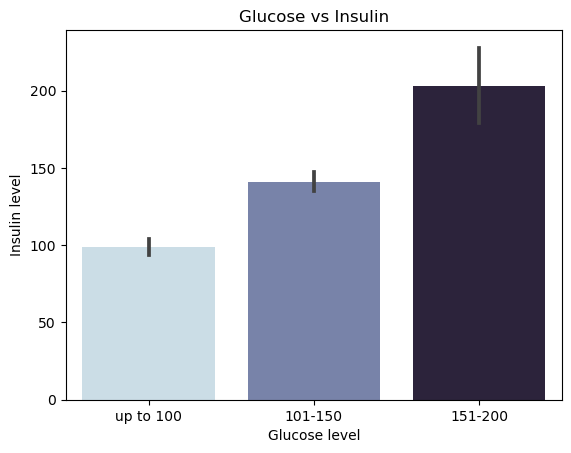

In [20]:
#plot_order = make_price.sort_values(ascending=False).index.values
sns.barplot(data=df, y="Insulin", x="Glucose", palette="ch:s=.25,rot=-.25")
plt.title('Glucose vs Insulin')
plt.ylabel('Insulin level')
plt.xlabel('Glucose level')

We can see that the higher glucose level the highier insulin level. Also as the glucose level rises the insulin level has wider range.

In [21]:
# Now lets bin BMI into categories
bin_labels_5 = [ 'underweight or normal','overweight', 'obese or extremely obese']
df['BMI'] = pd.cut(df['BMI'],
                        [0, 25, 30, 50],
                        labels = bin_labels_5)


<Figure size 640x480 with 0 Axes>

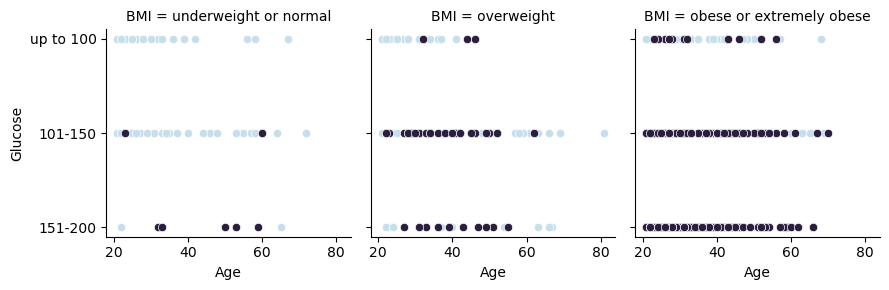

In [22]:
plt.figure()
fg = sns.FacetGrid(df, col='BMI', hue="Outcome", palette = "ch:s=.25,rot=-.25",
margin_titles=True)
fg.map(sns.scatterplot, "Age", "Glucose")
plt.show()
plt.close()

As we can see that people with normal BMI can be diabetic if their glucose level is high.
Being overweight and having glucose level highier than 100 almost guarantees disease. 